## TITANIC SURVIVAL PREDICTION

In [323]:
!python --version

Python 3.12.4


In [325]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
import seaborn as sns

In [329]:
df=pd.read_csv(r"C:\Users\vante\OneDrive\Desktop\Intern\Codsoft\Task-1-Titanic\Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [331]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Check for NULL Values

In [334]:
null=df.isnull().sum()

print(null)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Clean the data and remove the unnecessary data

In [337]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [339]:
df['Embarked']=df['Embarked'].fillna('S')

In [341]:
df.drop(columns='Cabin',inplace=True)

In [343]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Data is cleaned .

# EDA (Analyzing the data)

# In Survived
# Let 0=No and 1=Yes

In [348]:
survival_count=df['Survived'].value_counts()
survival_count

Survived
0    549
1    342
Name: count, dtype: int64

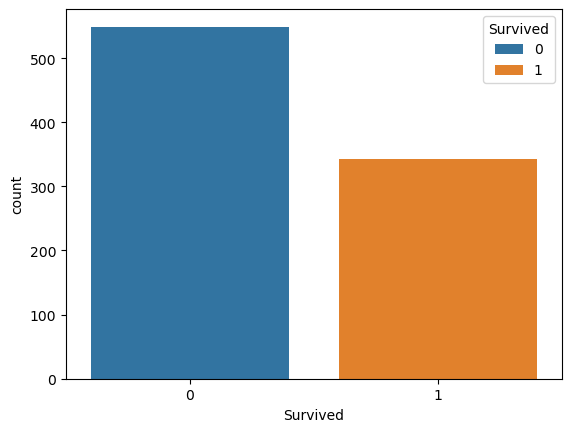

In [350]:
sns.countplot(data=df,x='Survived',hue='Survived')
plt.show()

In [352]:
classtype_count=df['Pclass'].value_counts()
print(classtype_count)
#Passenger class type

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


# In Pclass let 1=Upper class ,2=Middle class ,3=Lower class

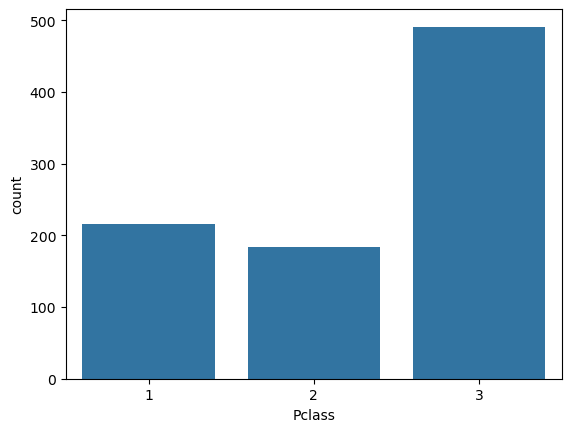

In [354]:
sns.countplot(data=df,x='Pclass')
plt.show()

In [355]:
gender_count=df['Sex'].value_counts()
gender_count

Sex
male      577
female    314
Name: count, dtype: int64

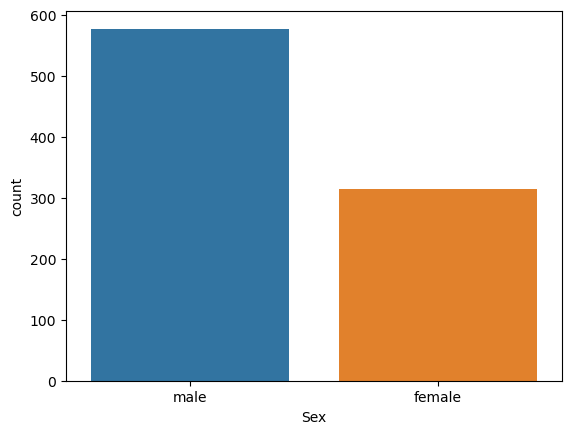

In [356]:
sns.countplot(data=df,x='Sex',hue='Sex')
plt.show()

# Count of Survived WRT Gender

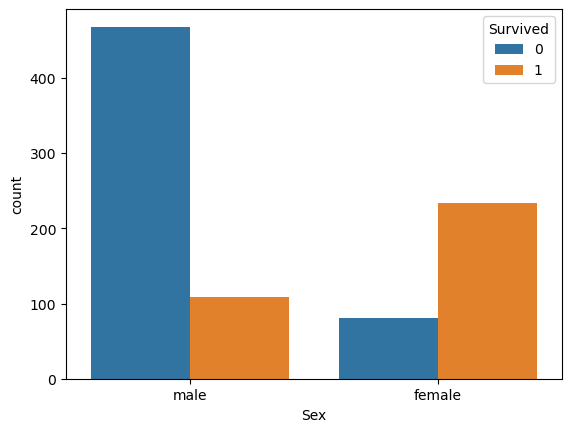

In [359]:
sns.countplot(x=df['Sex'],hue=df['Survived'])
plt.show()

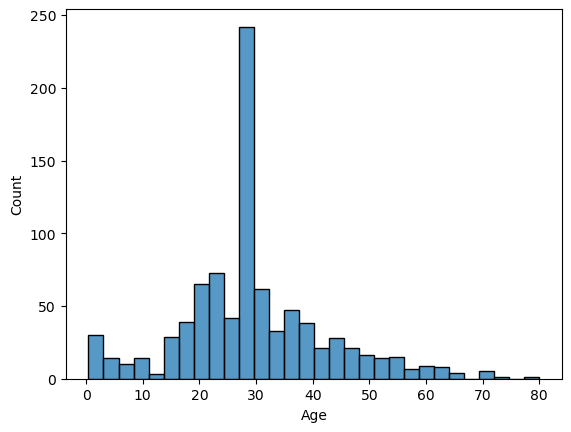

In [361]:
sns.histplot(data=df,x='Age')
plt.show()

# Count of Survived WRT Pclass

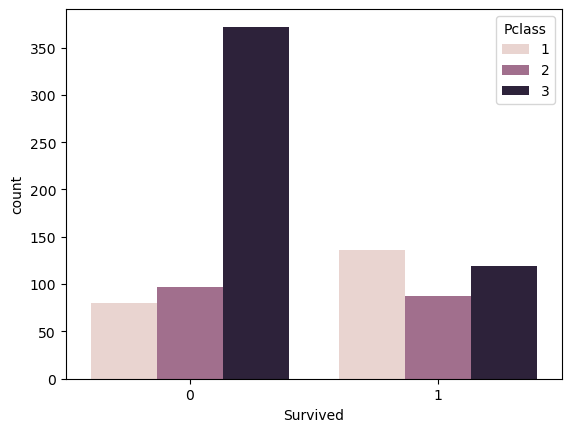

In [363]:
sns.countplot(data=df,x='Survived',hue='Pclass')
plt.show()

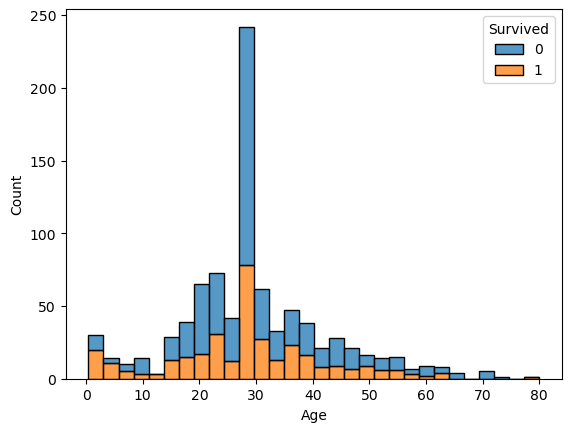

In [364]:
sns.histplot(data=df,x='Age',hue='Survived',multiple='stack')
plt.show()

In [366]:
df.replace({'Sex': {'male': 1, 'female': 0}}, inplace=True)


In [368]:
x=df[['Pclass','Sex']]
y=df['Survived']
x,y

(     Pclass  Sex
 0         3    1
 1         1    0
 2         3    0
 3         1    0
 4         3    1
 ..      ...  ...
 886       2    1
 887       1    0
 888       3    0
 889       1    1
 890       3    1
 
 [891 rows x 2 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

In [369]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [370]:
print(x.shape,x_train.shape,x_test.shape)

(891, 2) (712, 2) (179, 2)


In [371]:
print(y.shape,y_train.shape,y_test.shape)

(891,) (712,) (179,)


# Create training model

In [374]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
log=LogisticRegression(random_state=0)
log.fit(x_train, y_train)

LogisticRegression(random_state=0)

# Create prediction model

In [376]:
prediction=log.predict(x_test)
prediction

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [377]:
print("Accuracy Score: " ,accuracy_score(y_test,prediction))
print("Matrix: ",confusion_matrix(y_test,prediction))

Accuracy Score:  0.7877094972067039
Matrix:  [[92 18]
 [20 49]]


In [378]:
y_test

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64

In [379]:
last=x.iloc[:,:].values
y_final=log.predict(last)

In [380]:
y_final.shape

(891,)

In [382]:
final=pd.DataFrame()
final['Sex']=x['Sex']
final['Survived']=y_final

In [383]:
final.to_csv("Titanic.csv",index=False)

# Training Completed

In [385]:
import warnings
warnings.filterwarnings("ignore")
result=log.predict([[5,0]])
if(result==0):
    print("Not Survived")
else:
    print("Successfully Survived")

Not Survived
